In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [2]:
labels_train = []
labels_test = []


path_train = []
path_test = []

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_path = "/content/gdrive/MyDrive/Proje/train_zip/train"
test_path = "/content/gdrive/MyDrive/Proje/test_zip/test"

In [5]:
for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename)) 

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))  

In [6]:
labels_test

['apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'apple',
 'banana',
 'apple',
 'apple',
 'apple',
 'banana',
 'apple',
 'apple',
 'apple',
 'apple',
 'banana',
 'apple',
 'banana',
 'apple',
 'apple',
 'banana',
 'banana',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mixed',
 'orange',
 'mixed',
 'mixed',
 'orange',
 'banana',
 'orange',
 'banana',
 'banana',
 'mixed',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'mixed',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange']

In [7]:
label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))

In [8]:
print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(path_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for train are: ", len(path_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train are:  60


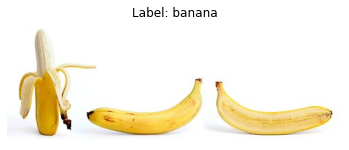

In [9]:
image = cv2.imread(path_train[1])
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(rgb_img)
plt.title("Label: " + labels_train[1])
plt.axis('off')
plt.show()

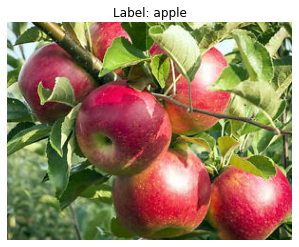

In [10]:
image = cv2.imread(path_test[0])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

In [11]:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (50,50))
    X_train.append(final_img)
    
X_train = np.array(X_train)    

In [12]:
X_train.shape

(240, 50, 50, 3)

In [13]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    X_test.append(final_img)
    
X_test = np.array(X_test)    

In [14]:
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits   

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [15]:

temp_train = []
temp_test = []


for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [16]:
import tensorflow

In [17]:
y_train = tensorflow.keras.utils.to_categorical(temp_train, 4)
y_test = tensorflow.keras.utils.to_categorical(temp_test, 4)

Length of X_train:  240


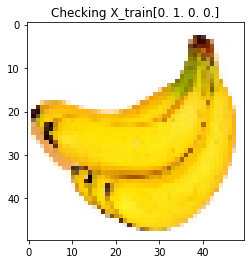

In [18]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[34])
plt.title("Checking X_train"+str(y_train[58]))
plt.show()

In [19]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding = 'same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

In [23]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        36928     
                                                        

In [25]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 150, validation_split = 0.2, shuffle = True)

Epoch 1/150
3/3 [==============================] - 3s 838ms/step - loss: 1.3930 - accuracy: 0.2917 - val_loss: 1.5217 - val_accuracy: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 2s 760ms/step - loss: 1.2544 - accuracy: 0.4323 - val_loss: 1.5611 - val_accuracy: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 2s 737ms/step - loss: 1.1652 - accuracy: 0.5365 - val_loss: 1.9904 - val_accuracy: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 2s 731ms/step - loss: 1.0429 - accuracy: 0.6823 - val_loss: 1.6641 - val_accuracy: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 2s 730ms/step - loss: 0.8571 - accuracy: 0.7240 - val_loss: 1.6560 - val_accuracy: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 2s 707ms/step - loss: 0.7266 - accuracy: 0.7344 - val_loss: 1.7301 - val_accuracy: 0.0625
Epoch 7/150
3/3 [==============================] - 2s 736ms/step - loss: 0.5880 - accuracy: 0.7865 - val_loss: 1.4355 - val_accuracy: 

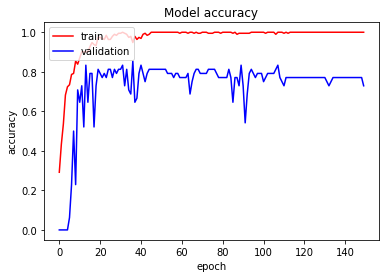

In [26]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

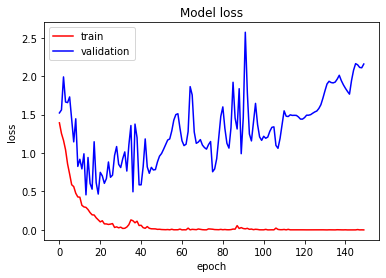

In [27]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 71ms/step - loss: 2.1456 - accuracy: 0.8500
Test score achieved: 2.1455862522125244
Test accuracy achieved: 0.8500000238418579


In [29]:
pred = model.predict(X_test)

In [30]:
np.argmax(pred)

0

apple



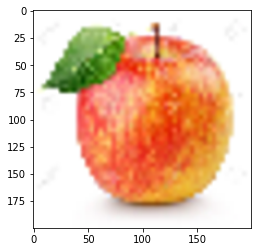

In [31]:
from PIL import Image as im
from PIL import Image
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
img = cv2.imread("/content/gdrive/MyDrive/Proje/test/apple2.jpeg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
final_img = cv2.resize(rgb_img, (50,50))

array = np.array([final_img])

a = model.predict(array)

typeFruit = np.argmax(a)
result = ""

if typeFruit == 0  : 
  result = "apple"
elif typeFruit == 1  : 
  result = "banana"
elif typeFruit == 2  : 
  result = "mixed"
else  : 
  result = "orange"

print(result)
print("")


data = im.fromarray(array[0])
img = data.resize((200,200))
window_name = 'Image'
font = cv2.FONT_HERSHEY_SIMPLEX

org = (200, 200)
fontScale = 1
color = (255, 0, 0)
thickness = 2
   
#img = cv2.putText(img, 'OpenCV', org, font, fontScale, color, thickness, cv2.LINE_AA)
   
# Displaying the image
#cv2.imshow('image',img)
plt.imshow(img)
plt.show()



